### DBSCAN
Esta sección comprende los ejercicios con el algoritmo dbscan

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt

sa=9
%matplotlib inline

### Ejercicio

Use el metodo dbscan aplicando el algoritmo en diferentes datasets

In [4]:
dfcan = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
dfcan.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


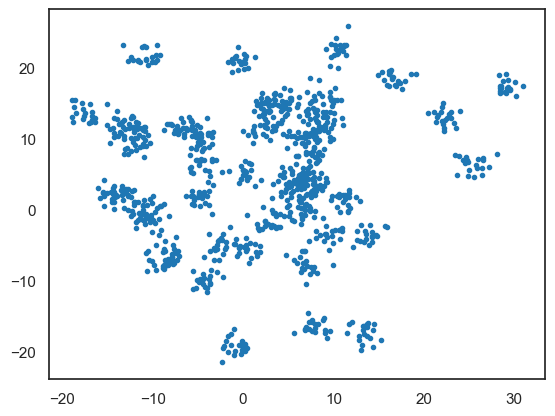

In [5]:
plt.scatter(dfcan['x'], dfcan['y'], s=sa)
plt.show()

In [6]:
clusters= DBSCAN(eps=2, min_samples=10)
clusters.fit(dfcan)
#dfcan['C']=clusters.labels_
print(f'Grupos encontrados {len(set(clusters.labels_)- set([-1]))} grupos y {(clusters.labels_==-1).sum()} puntos de ruido.') 

Grupos encontrados 15 grupos y 3 puntos de ruido.


### Ejercicio 3 
Visualize los grupos realizados por dbscan

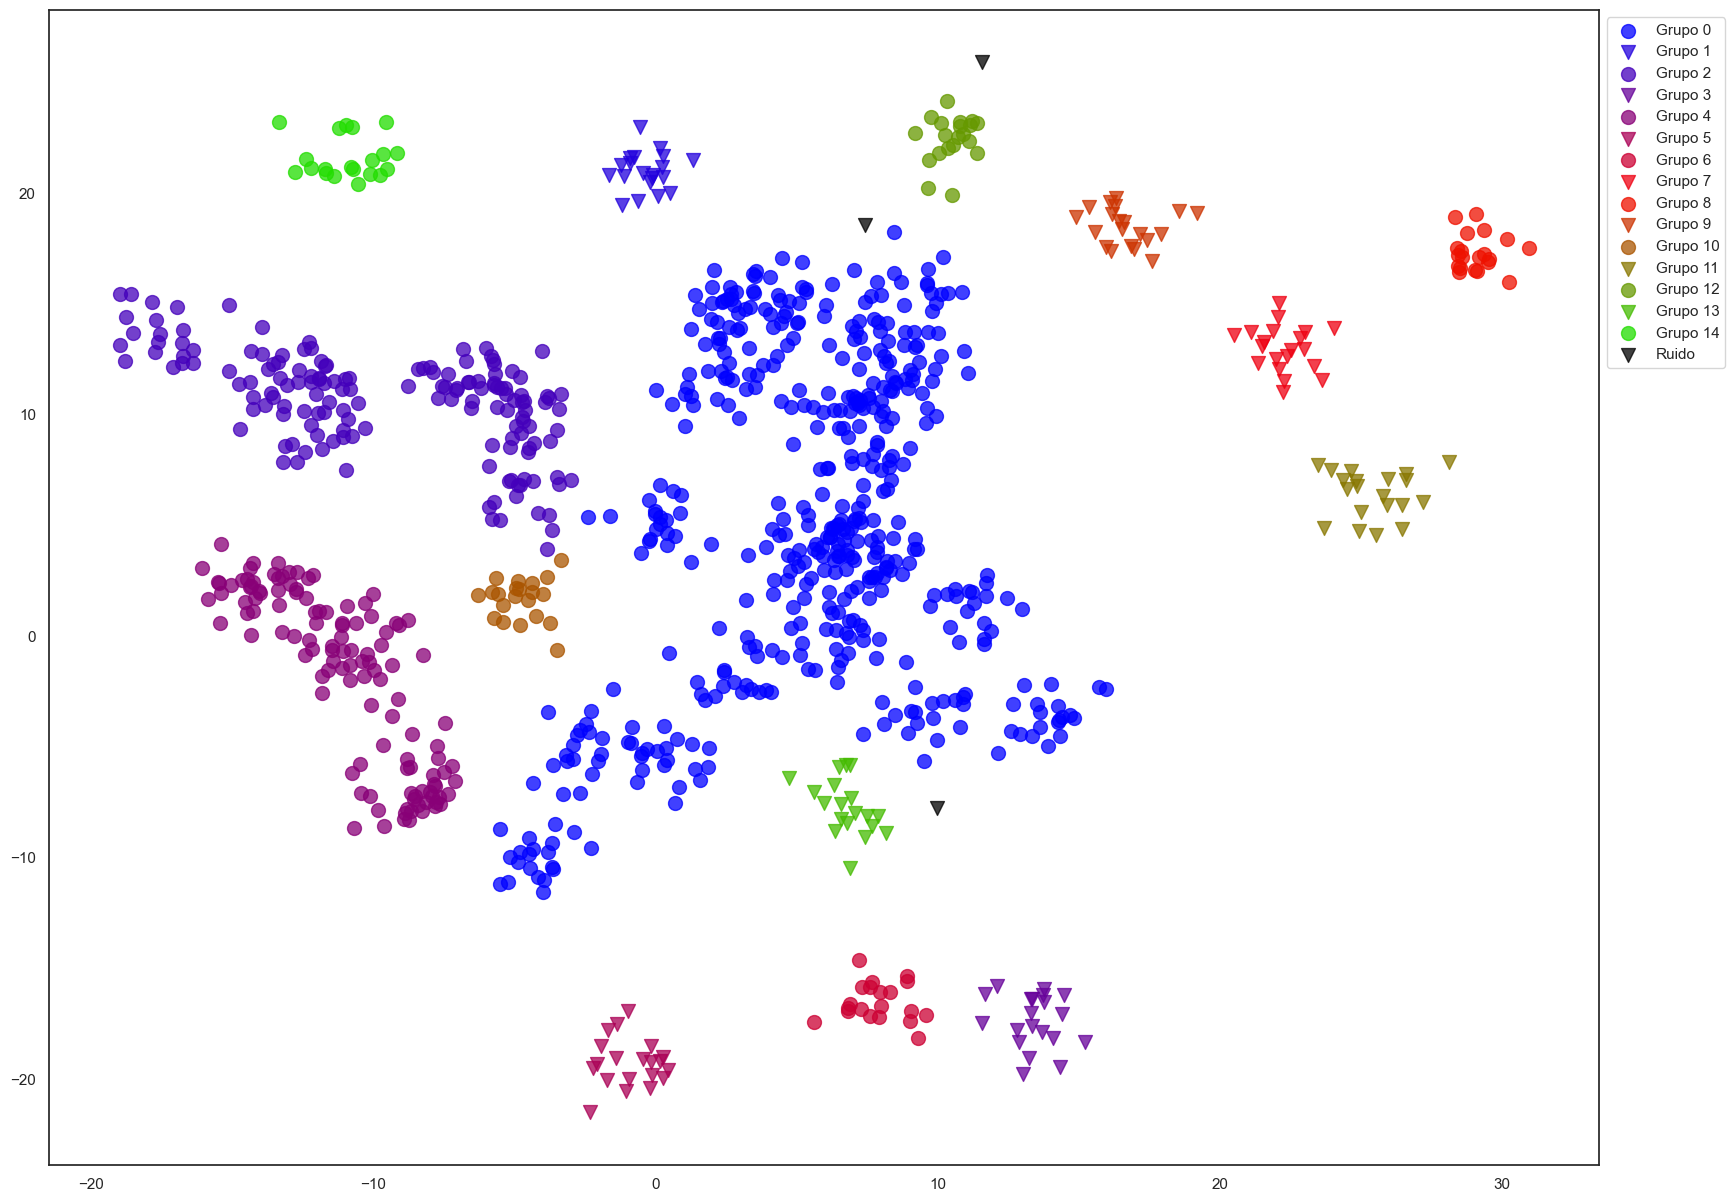

In [7]:
# array con el valor unico de las etiquetas
etiquetas= set(clusters.labels_)
neti=len(etiquetas)
# se toma un mapa de color con los valores de las etiquetas a partir de la cantidad de valores en la array
cmap=plt.cm.get_cmap('brg',neti)
# formato de la figura
plt.rcParams['figure.figsize'] = (20,15)
# el ciclo for pasa por cada valor unico del array etiquetas e imprime los datos que coicidan con la iteracion
# superponiendo cada scatter por iteracion en el mismo plot
for l in etiquetas:
            plt.scatter(
                dfcan['x'][clusters.labels_==l],
                dfcan['y'][clusters.labels_==l],
                # los colores se eligen por iteracion del mapa de calor como el valor -1 no se toma en cmap se 
                # clasifica directamente como negro
                c=[cmap(l) if l >= 0 else 'Black'],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                # se imprimen los clusters y -1 se clasifica diretametne como ruido
                label=f'Grupo {l}' if l >= 0 else 'Ruido')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

## Ejercicio 2 
Denote el porcentaje de ruido en el dataset

In [8]:
#se realiza un array con los indices cuyos datos en clusters.label_ sean -1
ruido=np.where(clusters.labels_==-1)[0]
#se toma la longitud de la array como el numero de datos clasificados como ruido
#y se divide por el total de datos 
porcen=len(ruido)/len(clusters.labels_)
print(porcen*100)

0.3


### KMEANS

In [9]:
from sklearn.cluster import KMeans

 ## Ejercicio 1
 
  Realice un agrupamiento por kmeans con k=2

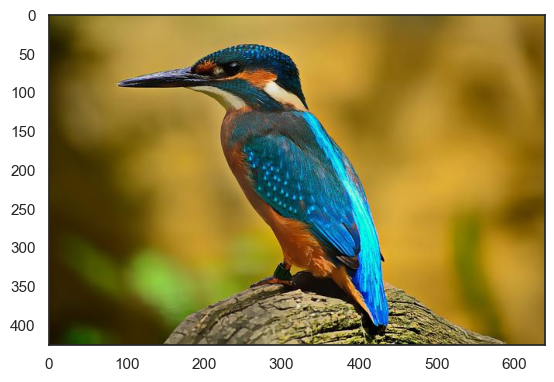

In [10]:
#img=plt.imread('Sunnylady.jpg')
img = plt.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg', format='jpeg')
plt.imshow(img)

In [11]:
'''Se rescala la imagen de una matriz donde cada posición tenia los valores de los 3 canales a una array con los valores
de los 3 canales en cada pixel'''
numG=2
kmG=KMeans(n_clusters=numG, random_state=42)
kmG.fit(Kimg)

KMeans(n_clusters=2, random_state=42)

In [67]:
'''La segmentación parte de una "mascara" que es una array de 0's con el tamaño de la array de los 3 canales
Para cada i en la lista de clusters si el cluster de un dato coincide con la iteración entonces esa posición tomara 
el mismo valor para todos los canales el cual es el valor del centro del cluster de la i-esima iteración
se re escala el segmento a partir de la forma de la imagen, por lo que cada posición que solia ser una fila de la array
tiene los 3 canales con el valor al cluster que pertenecen'''
def GraphK(img,k):
    c=img.reshape(-1,3)
    a=set(k.labels_)
    b=np.zeros(c.shape)
    for i in a:
        b[k.labels_==i,:]=k.cluster_centers_[i]
    b=b.reshape(img.shape).astype(np.uint8)
    return b

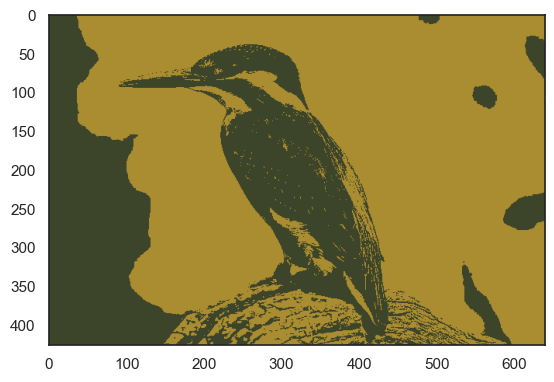

In [65]:
ali2=GraphK(img,kmG)
plt.imshow(ali2)

# Ejercicio 3
segmente la imagen con 4 grupos y proyecte el resultado

In [1]:
KmG4=KMeans(n_clusters=4)
KmG4.fit(Kimg)

KMeans(n_clusters=4)

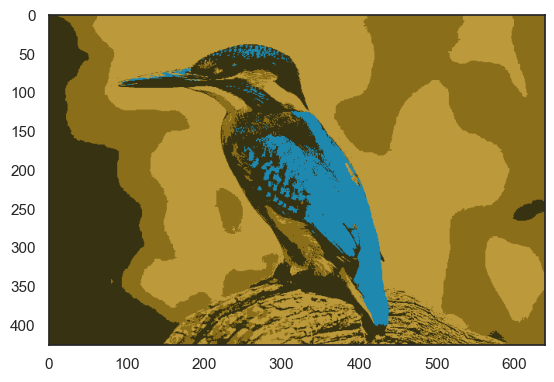

In [60]:
ali=GraphK(img,KmG4)
plt.imshow(ali)